<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/ASSIGNMENT_HATE_SPEECH_TWITTER_JUN_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Twitter Hate Speech   
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.     

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.      

 # Motivation     
Hate  speech  is  an  unfortunately  common  occurrence  on  the  Internet.  Often social media sites like Facebook and Twitter face the problem of identifying and censoring  problematic  posts  while weighing the right to freedom of speech. The  importance  of  detecting  and  moderating hate  speech  is  evident  from  the  strong  connection between hate speech and actual hate crimes. Early identification of users promoting  hate  speech  could  enable  outreach  programs that attempt to prevent an escalation from speech to action. Sites such as Twitter and Facebook have been seeking  to  actively  combat  hate  speech. In spite of these reasons, NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech, an analysis of its demographic influences, and an investigation of the most effective features.    

# Data    
Our overall collection of tweets was split in the ratio of 65:35 into training and testing data. Out of the testing data, 30% is public and the rest is private.     

 # Data Files       
 # train.csv - For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.      
There is 1 test file (public)   
# test_tweets.csv - The test data file contains only tweet ids and the tweet text with each tweet in a new line.    
 
# Submission Details   
The following 3 files are to be uploaded.

 # test_predictions.csv - This should contain the 0/1 label for the tweets in test_tweets.csv, in the same order corresponding to the tweets in test_tweets.csv. Each 0/1 label should be in a new line.    
 
# A .zip file of source code - The code should produce the output file submitted and must be properly commented.    
 
# Evaluation Metric:    
The metric used for evaluating the performance of classification model would be F1-Score.     

The metric can be understood as -    

#  True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.    

# True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.   

# False Positives (FP) – When actual class is no and predicted class is yes.   

# False Negatives (FN) – When actual class is yes but predicted class in no.   

# Precision = TP/TP+FP   

# Recall = TP/TP+FN   

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)   

F1 is usually more useful than accuracy, especially if for an uneven class distribution.

#Process to be followed     
1. Loading the Dataset       
2. Pre-processing the Dataset        
3. Feature Engineering and Model Building         
a. Creating Meta Features        
b. Counting Nouns and Verbs        
c. Model Building for Meta Features        
d. Tf-Idf Features        
e. Model Building for Complete Feature Set         

1. Loading the dataset

In [89]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
# Import libraries 
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [63]:
# Load test dataset
test = pd.read_csv('/content/test_tweets_anuFYb8.csv')
test.shape

(17197, 2)

In [64]:
# Load train dataset
train = pd.read_csv('/content/train_E6oV3lV.csv')
train.shape

(31962, 3)

In [65]:
# distribution of class in train_data
train['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [66]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [67]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [74]:
#Check for missing data if any 
print("Train missing data :",train.isnull().any())
print("Test missing data : ",test.isnull().any())

Train missing data : id       False
label    False
tweet    False
dtype: bool
Test missing data :  id       False
tweet    False
dtype: bool


In [75]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [76]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


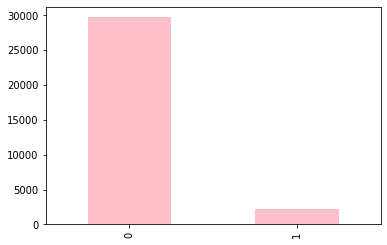

In [77]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

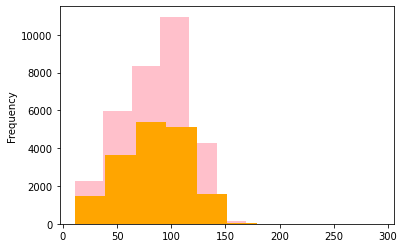

In [78]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [79]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [80]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

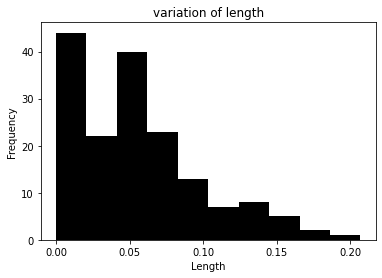

In [81]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

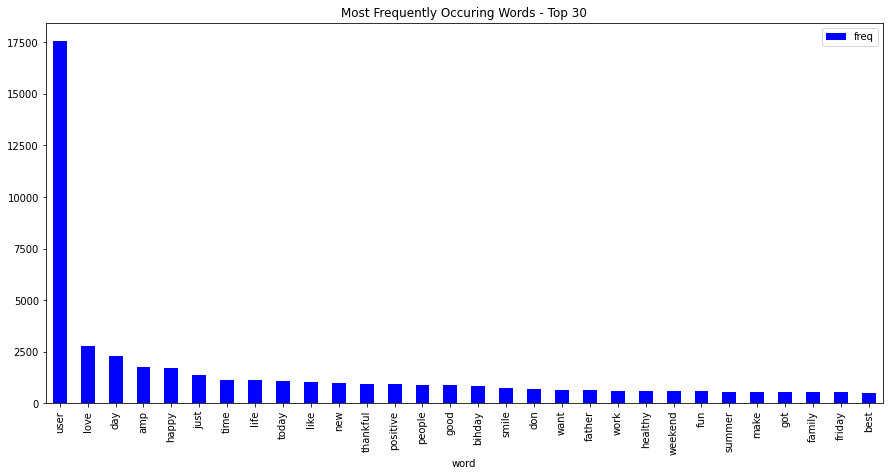

In [82]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

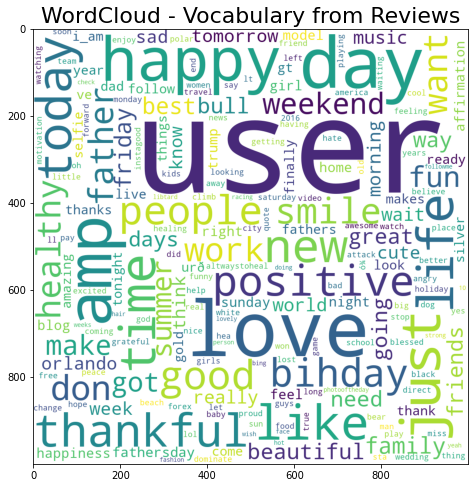

In [83]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

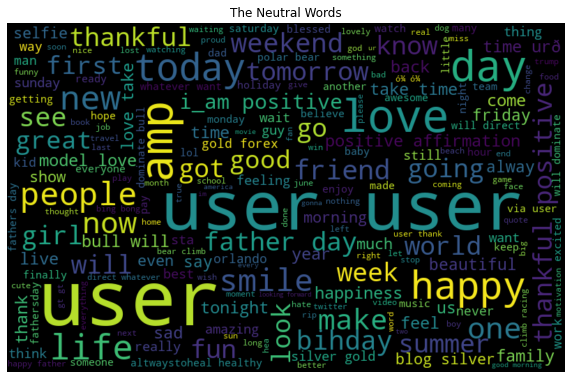

In [84]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

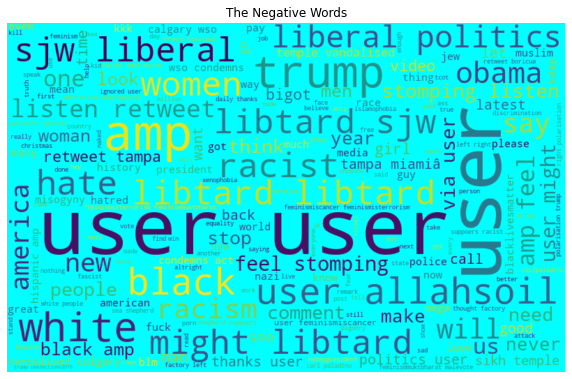

In [85]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [86]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [87]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

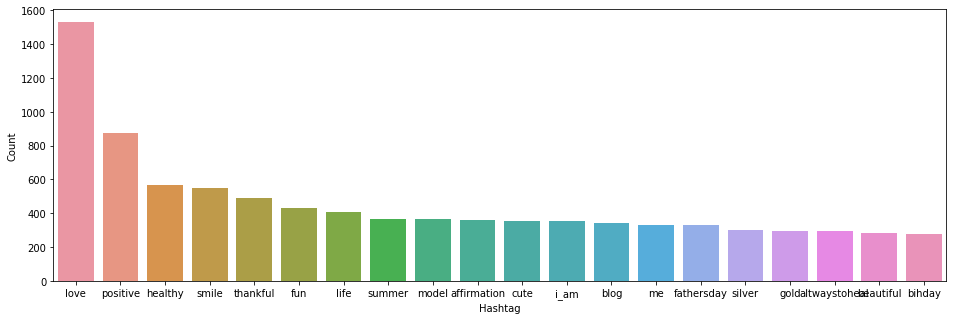

In [91]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

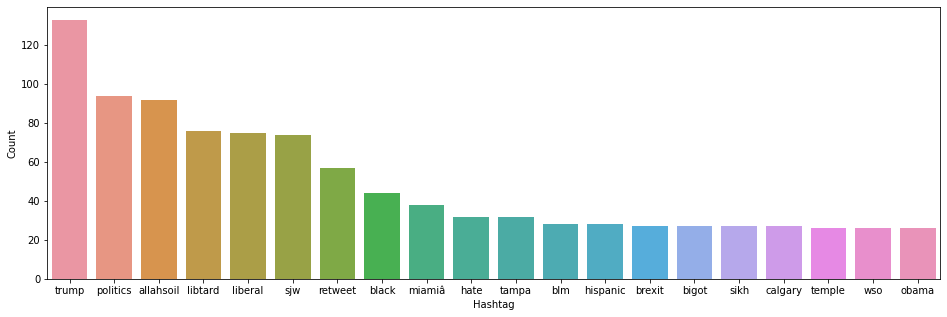

In [92]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [93]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6108866, 8411580)

In [94]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6477847099304199),
 ('shopping!', 0.6276452541351318),
 ('#prosecco', 0.6147410869598389),
 ('sister!!', 0.6131964325904846),
 ('#boardgames', 0.600986897945404),
 ('dialogue', 0.6002111434936523),
 ('bay.', 0.5970634818077087),
 ('enroute', 0.5967865586280823),
 ('podium', 0.5960241556167603),
 ('#chilled', 0.5957912802696228)]

In [95]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7334650754928589),
 ('devoted', 0.7203360199928284),
 ('enteaining', 0.7194758057594299),
 ('level.', 0.7121347188949585),
 ('ways.', 0.7088321447372437),
 ('politicizing', 0.7052384614944458),
 ('spewing', 0.7047734260559082),
 ('law.', 0.703248143196106),
 ('#missthem', 0.7013564109802246),
 ('suffer', 0.701095461845398)]

In [96]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7187079787254333),
 ('mytraining', 0.7086901664733887),
 ('training"', 0.6965984106063843),
 ('app,', 0.626113772392273),
 ('"my', 0.6117310523986816),
 ('ta', 0.6009119749069214),
 ('ð\x9f\x8eµð\x9f\x8e¶', 0.5840101838111877),
 ('app', 0.5820691585540771),
 ('heroku', 0.5713753700256348),
 ('bees', 0.5623521208763123)]

In [97]:
model_w2v.wv.most_similar(negative = "hate")

[('#yay', -0.011670876294374466),
 ('#apple', -0.025984719395637512),
 ('#fundraising', -0.056588560342788696),
 ('now.', -0.0668499693274498),
 ('you?', -0.0683477371931076),
 ('#amwriting', -0.07079136371612549),
 ('#games', -0.07149441540241241),
 ('#hype', -0.07159221172332764),
 ('#confused', -0.0728762224316597),
 ('ð\x9f\x98\x81', -0.08182557672262192)]

In [98]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [99]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [100]:
# removing unwanted patterns from the data

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [101]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [102]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [104]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [105]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [106]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [107]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.999123941429227
Validation Accuracy : 0.9520710799649605
F1 score : 0.6111675126903553
[[7307  125]
 [ 258  301]]


In [133]:
submission= pd.read_csv("/content/sample_submission_gfvA5FD.csv")

In [134]:
test_pred=model.predict(x_test)

In [136]:
submission["label"]= test_pred

In [137]:
submission.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,1


In [139]:
submission.to_csv("sub_2_lr.csv", index=False)

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [110]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9311725691402828
f1 score : 0.532312925170068
[[7128  304]
 [ 246  313]]


In [111]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]


In [126]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9445997246673064
Validation Accuracy : 0.9433112251282693
f1 score : 0.35378031383737524
[[7414   18]
 [ 435  124]]


In [113]:
submission= pd.read_csv("/content/sample_submission_gfvA5FD.csv")

In [115]:
submission.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [127]:
submission["label"]= model.predict(x_test)

In [130]:
submission["label"].value_counts()

0    17131
1       66
Name: label, dtype: int64

In [129]:
submission.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [131]:
submission.to_csv("Submission_1.csv") #converting the dataframe into CSV file with rounded values

# Pre-processing the train_dataset

In [5]:
# Sample document: lowercase
cleaned = train['tweet'][0].lower()

In [6]:
# Sample document
cleaned

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [7]:
# Pre-initialised list of punctuations
punctuations = string.punctuation

In [8]:
# Pre-initialised list of punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# Sample document: Remove punctuations
cleaned = "".join(character for character in cleaned if character not in punctuations)    

In [10]:
# Sample document
cleaned

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run'

In [11]:
# Import spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

In [12]:
# spacy document
my_doc = nlp(cleaned)

In [13]:
# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

In [14]:
# Import stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [15]:
# Create list of word tokens after removing stopwords
filtered_sentence =[] 

# Iterate over the tokens
for word in token_list:
    # Get token text
    lexeme = nlp.vocab[word]
    # Check if stopword or not
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 

# Print tokens and filtered sentence
print(token_list)
print(filtered_sentence)
cleaned = filtered_sentence

[' ', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '  ', 'run']
[' ', 'user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '  ', 'run']


In [16]:
# Joining the tokenised words in sample document
cleaned = " ".join(cleaned)
cleaned

'  user father dysfunctional selfish drags kids dysfunction    run'

In [42]:
# Preprocessing function
def clean_text(text):
    ## lower case 
  cleaned = text.lower()

    # Remove unicode characters
  cleaned = re.sub(r"<U\+[A-Z0-9]+>|<ed>", "", cleaned)
    # Remove newline and rawstring characters
  cleaned = re.sub(r"\n|\r", "", cleaned)
    
    ## remove punctuations
  punctuations = string.punctuation
  cleaned = "".join(character for character in cleaned if character not in punctuations)
    
    # remove stopwords 
  my_doc = nlp(cleaned)
  token_list = []
  for token in my_doc:
    token_list.append(token.text)
    
    ## remove stop words
    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    
    ## Store cleaned document
  cleaned = filtered_sentence
  cleaned = " ".join(cleaned)
    
  return cleaned

In [43]:
# Applying the preprocessin function
train_data["cleaned"] = train_data["tweet"].apply(lambda x : clean_text(x))
train_data.head(10)

,id,label,tweet,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids...,18,8,65,53,0
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit nt use cause nt o...,19,15,97,79,0
2,3,0,bihday your majesty,bihday majesty,3,2,17,13,0
3,4,0,#model i love u take with u all the time in ...,model love u u time urð± ðððð ...,14,13,67,49,0
4,5,0,factsguide: society now #motivation,factsguide society motivation,4,3,35,27,0
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...,19,11,70,58,1
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user user us...,11,12,68,55,0
7,8,0,the next school year is the year for exams.ð...,school year year examsð¯ nt think ð­ schoo...,21,14,102,86,0
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,won love land allin cavs champions cleveland c...,11,10,70,59,0
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome m gr8,10,5,33,19,0


# 3. Feature Engineering and Model Building

# Creating Meta Features    
- Number of words in original text    
- Number of words in cleaned text    
- Number of characters including spaces in the cleaned text   
- Number of characters excluding spaces in the cleaned text  
- Number of digits in the cleaned text 

In [20]:
# Creating meta features

# Number of words in original text
train_data["word_count"] = train_data["tweet"].apply(lambda x : len(x.split()))
# Number of words in cleaned text
train_data["word_count_cleand"] = train_data["cleaned"].apply(lambda x : len(x.split()))

# Number of characters including spaces in the cleaned text
train_data["char_count"] = train_data["cleaned"].apply(lambda x : len(x))
# number of characters excluding spaces in the cleaned text
train_data["char_count_without_spaces"] = train_data["cleaned"].apply(lambda x : len(x.replace(" ","")))

# Number of digits in the cleaned text
train_data["num_dig"] = train_data["cleaned"].apply(lambda x :  sum([1 if w.isdigit() else 0 for w in x.split()]))

In [21]:
# Print dataset
train_data.head()

,id,label,tweet,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids...,18,8,65,53,0
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit nt use cause nt o...,19,15,97,79,0
2,3,0,bihday your majesty,bihday majesty,3,2,17,13,0
3,4,0,#model i love u take with u all the time in ...,model love u u time urð± ðððð ...,14,13,67,49,0
4,5,0,factsguide: society now #motivation,factsguide society motivation,4,3,35,27,0


b. Counting Nouns and Verbs

In [22]:
# Import spacy English language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [23]:
# spacy document
document = nlp(train_data['cleaned'][0])

In [24]:
# Sample document
document

  user father dysfunctional selfish drags kids dysfunction    run

In [25]:
# POS tags
all_tags = []
for w in document:
    all_tags.append(w.tag_)

In [26]:
# POS tags
all_tags

['_SP', 'NN', 'NNP', 'JJ', 'JJ', 'VBZ', 'NNS', 'NN', '_SP', 'NN']

In [27]:
# Dictionary of noun and verb POS tags
pos_dic = {"noun" : ["NNP", "NN", "NNS", "NNPS"], "verb" : ["VBZ", "VB", "VBD","VBG", "VBN"]}

In [28]:
# Sample document: Noun count
count = 0
for tag in all_tags:
    if tag in pos_dic['noun']:
        count += 1

In [29]:
# Sample document: Noun count
count

5

In [30]:
# Function for noun and verb counts
def pos_check(txt, family):

    # spacy document
    txt = nlp(txt)
    
    all_tags = []

    # Get pos tag
    for w in txt:
        all_tags.append(w.tag_)
    
    count = 0

    # Count number of nouns and verbs
    for tag in all_tags:
        if tag in pos_dic[family]:
            count += 1

    return count

In [44]:
# Sample document: Noun count
pos_check("user father dysfunctional selfish drags kids...", "verb")

1

In [45]:
# Sample document: Verb count
pos_check("user father dysfunctional selfish drags kids...", "noun")

4

In [46]:
# Applying the function
train_data["noun_count"] = train_data["cleaned"].apply(lambda x : pos_check(x, "noun"))
train_data["verb_count"] = train_data["cleaned"].apply(lambda x : pos_check(x, "verb"))

In [47]:
# Print output
train_data.head()

,id,label,tweet,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig,noun_count,verb_count
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids...,18,8,65,53,0,5,1
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit nt use cause nt o...,19,15,97,79,0,8,3
2,3,0,bihday your majesty,bihday majesty,3,2,17,13,0,2,0
3,4,0,#model i love u take with u all the time in ...,model love u u time urð± ðððð ...,14,13,67,49,0,7,0
4,5,0,factsguide: society now #motivation,factsguide society motivation,4,3,35,27,0,3,0


# c. Model Building for Meta Features

In [49]:
# Label encoding target variable
from sklearn.preprocessing import LabelEncoder 

target = train_data["label"].values
target = LabelEncoder().fit_transform(target)

In [50]:
# List of features
train = train_data[['word_count', 'word_count_cleand', 'char_count', 
              'char_count_without_spaces', 'num_dig', 'noun_count', 
              'verb_count']]

In [51]:
# Train-Validation split
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_data, target, random_state=20, stratify=target)

In [52]:
# Train and Validatio dataset
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((23971, 11), (23971,)), ((7991, 11), (7991,)))

In [53]:
# Naive bayes
from sklearn import naive_bayes

In [54]:
# Multinomial naive bayes
model = naive_bayes.MultinomialNB()

In [56]:
# Fit model on training data
model.fit(x_train, y_train)

ValueError: ignored